<a href="https://colab.research.google.com/github/HannahMwende/LP4-Project/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import packages

In [1]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import streamlit as st
import pandas as pd
import numpy as np

In [9]:
data=pd.read_excel("Stores Complete Data.xlsx")
data

,Unnamed: 0,id,date,store_number,family,sales,onpromotion,city,state,type,cluster,oil_prices,holiday_type,locale,locale_name,description,transferred
0,0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,97.010002,Holiday,National,Ecuador,Primer dia del ano,False
1,1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,97.010002,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,97.010002,Holiday,National,Ecuador,Primer dia del ano,False
3,3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,97.010002,Holiday,National,Ecuador,Primer dia del ano,False
4,4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,97.010002,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352831,352831,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False
352832,352832,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False
352833,352833,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False
352834,352834,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [13]:
data.columns

Index(['Unnamed: 0', 'id', 'date', 'store_number', 'family', 'sales',
       'onpromotion', 'city', 'state', 'type', 'cluster', 'oil_prices',
       'holiday_type', 'locale', 'locale_name', 'description', 'transferred'],
      dtype='object')

In [15]:
data=data.drop(columns='Unnamed: 0')
data

,id,date,store_number,family,sales,onpromotion,city,state,type,cluster,oil_prices,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,97.010002,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,97.010002,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,97.010002,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,97.010002,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,97.010002,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352831,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False
352832,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False
352833,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False
352834,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [21]:
data.describe()

,id,store_number,sales,onpromotion,cluster,oil_prices
count,3.528360e+05,352836.000000,352836.000000,352836.000000,352836.000000,352836.000000
mean,1.628316e+06,27.500000,370.968396,3.402351,8.481481,64.966162
std,7.954575e+05,15.585806,1196.785036,14.857531,4.649741,25.414209
min,0.000000e+00,1.000000,0.000000,0.000000,1.000000,27.959999
25%,9.751990e+05,14.000000,0.000000,0.000000,4.000000,45.130001
50%,1.687554e+06,27.500000,12.000000,0.000000,8.500000,52.320000
75%,2.183840e+06,41.000000,202.000000,0.000000,13.000000,95.250000
max,3.000887e+06,54.000000,124717.000000,716.000000,17.000000,107.949997


In [23]:
object_columns = data.select_dtypes(include='object').columns.tolist()
object_columns

['family',
 'city',
 'state',
 'type',
 'holiday_type',
 'locale',
 'locale_name',
 'description']

Text(0.5, 1.0, 'Top 10 Sales Count against State')

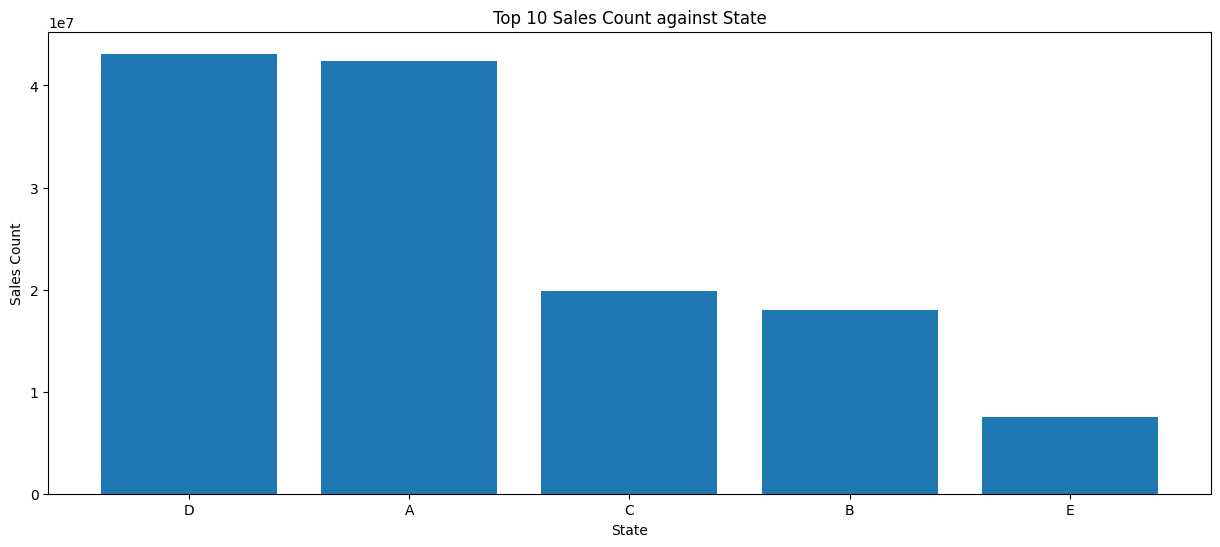

In [26]:
import matplotlib.pyplot as plt
data['date']=pd.to_datetime(data['date'])
data_daily=data.groupby('type')['sales'].sum().head(10)
data_daily= data_daily.sort_values(ascending=False)
plt.figure(figsize= (15,6))
plt.bar(data_daily.index,data_daily.values)
plt.xlabel('State')
plt.ylabel('Sales Count')
plt.title('Top 10 Sales Count against State')